In [1]:
include("../path.jl")
include("../ToolBox/ToolBox.jl")
using .ToolBox
using .Geometry

In [50]:
master_view = [2000:6000,1000:9000]
small = 5001:8001

5001:8001

In [3]:
# load meta and pod
master_meta = Load.slc_meta(master_meta_path);
master_precise_orbit = Load.precise_orbit(master_pod_path,master_meta["t_0"]);
slave_meta = Load.slc_meta(slave_meta_path);
slave_precise_orbit = Load.precise_orbit(slave_pod_path,slave_meta["t_0"]);

In [4]:
meta = (master_meta,slave_meta)
precise_orbit = (master_precise_orbit,slave_precise_orbit);

In [5]:
# load DEM
footprint = SlcUtil.footprint(master_meta, master_view)
latlon_window = ((minimum(footprint[1]),maximum(footprint[1])),(minimum(footprint[2]),maximum(footprint[2])))
dem = Load.dem(dem_path, latlon_window; nan_fill= 0, padding=[90,90]);

In [7]:
slave_data,flat,lut =  coregister_slave(master_view,slave_data_path,meta,precise_orbit,dem)
slave_data,mosaic_view = SlcUtil.mosaic(slave_data,master_view,meta[1]);
flat,mosaic_view = SlcUtil.mosaic(flat,master_view,meta[1]);

LoadError: syntax: unexpected "]" in argument list

In [44]:
master_data = Load.slc_data(master_data_path,master_view);
master_data,mosaic_view = SlcUtil.mosaic(master_data,master_view,meta[1]);

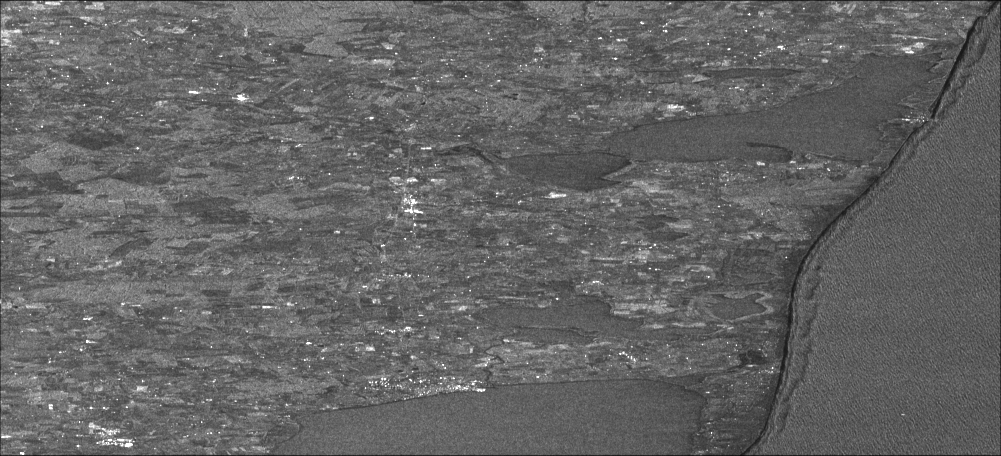

In [47]:
SlcUtil.show_img(master_data)

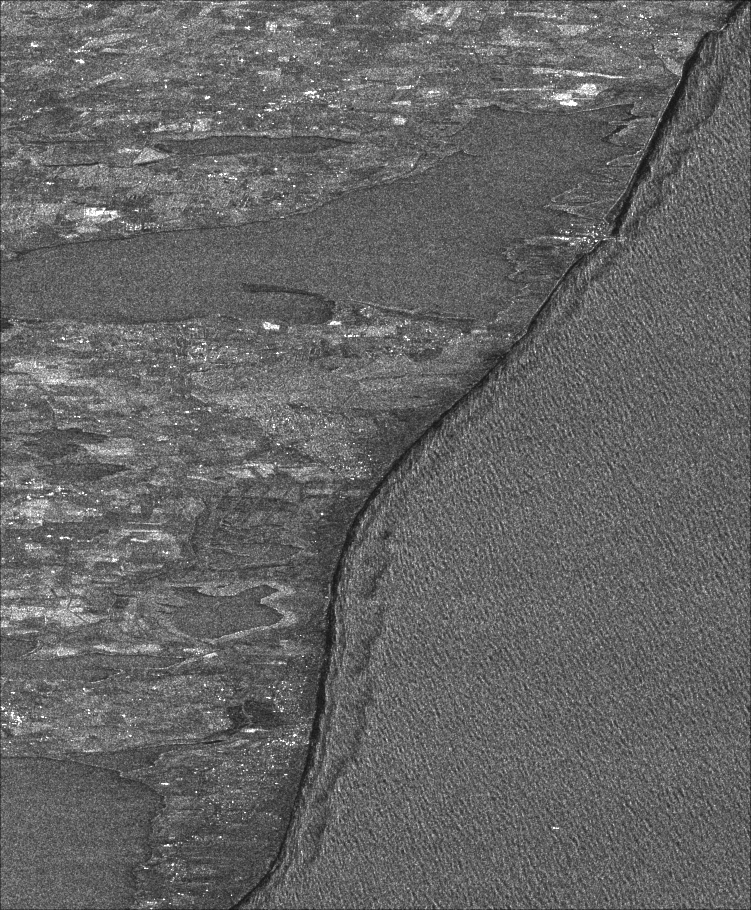

In [51]:
SlcUtil.show_img(master_data[:,small])

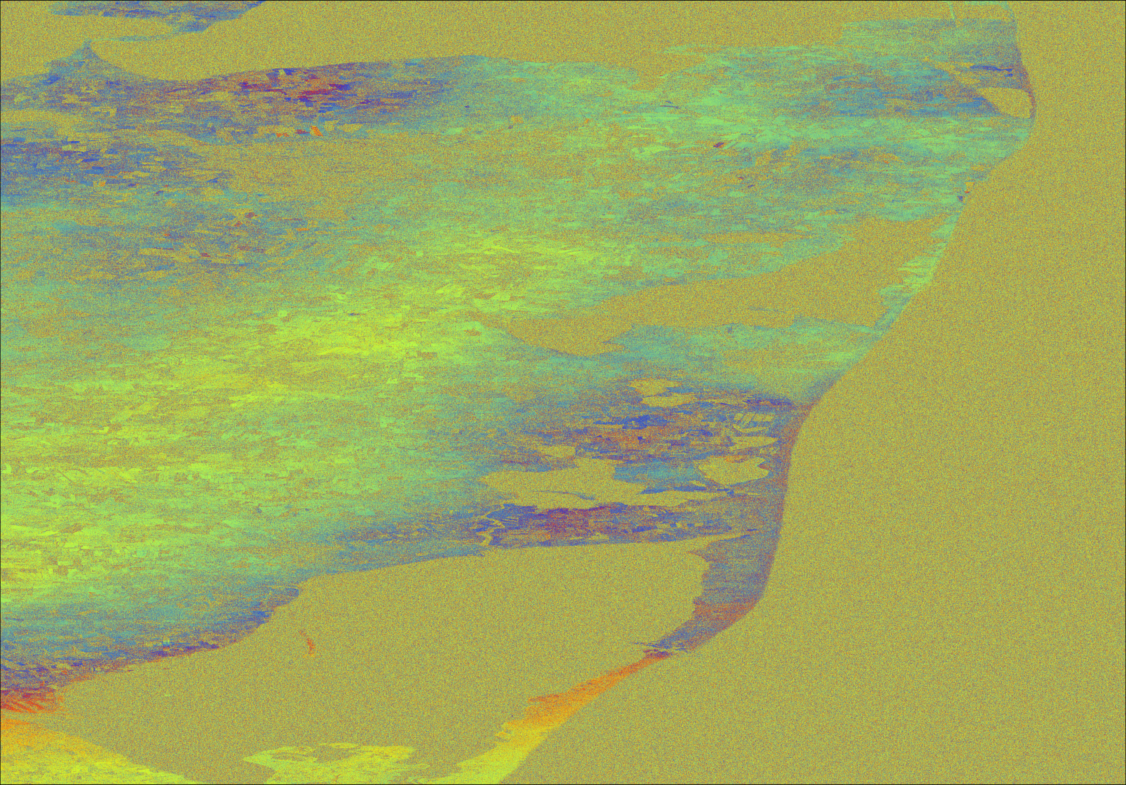

In [15]:
SlcUtil.plot_phase(master_data.* conj.(slave_data) .*flat)

In [16]:
SlcUtil._phase_colorbar()

 -π                 -π/2                 0                 π/2                 π


In [17]:
import FileIO
FileIO.save("infero_mosaic_12days.jpg", SlcUtil.plot_phase(master_data.* conj.(slave_data) .*flat))